In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_data.csv')
df.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [3]:
df[['project_grade_category','project_subject_categories','project_is_approved']].isna().sum()

project_grade_category        0
project_subject_categories    0
project_is_approved           0
dtype: int64

In [4]:
df[['project_grade_category','project_subject_categories','project_is_approved']]

,project_grade_category,project_subject_categories,project_is_approved
0,Grades PreK-2,Literacy & Language,0
1,Grades 6-8,"History & Civics, Health & Sports",1
2,Grades 6-8,Health & Sports,0
3,Grades PreK-2,"Literacy & Language, Math & Science",1
4,Grades PreK-2,Math & Science,1
...,...,...,...
109243,Grades PreK-2,"Literacy & Language, Math & Science",1
109244,Grades PreK-2,"Literacy & Language, Math & Science",1
109245,Grades PreK-2,"Literacy & Language, Math & Science",1
109246,Grades 3-5,"Health & Sports, Special Needs",1


In [5]:
grouped = df.groupby(['project_subject_categories'])['project_is_approved'].mean().reset_index()
grouped.columns = ['Subject Category', 'Approval Rate']

In [6]:
grouped.sort_values(by='Approval Rate', ascending=False)

,Subject Category,Approval Rate
15,"Health & Sports, Warmth, Care & Hunger",0.956522
50,"Warmth, Care & Hunger",0.925898
18,"History & Civics, Health & Sports",0.923077
19,"History & Civics, Literacy & Language",0.894441
10,"Health & Sports, History & Civics",0.883721
27,"Literacy & Language, History & Civics",0.877627
44,"Music & The Arts, Special Needs",0.876812
14,"Health & Sports, Special Needs",0.873472
28,"Literacy & Language, Math & Science",0.869432
24,Literacy & Language,0.867470


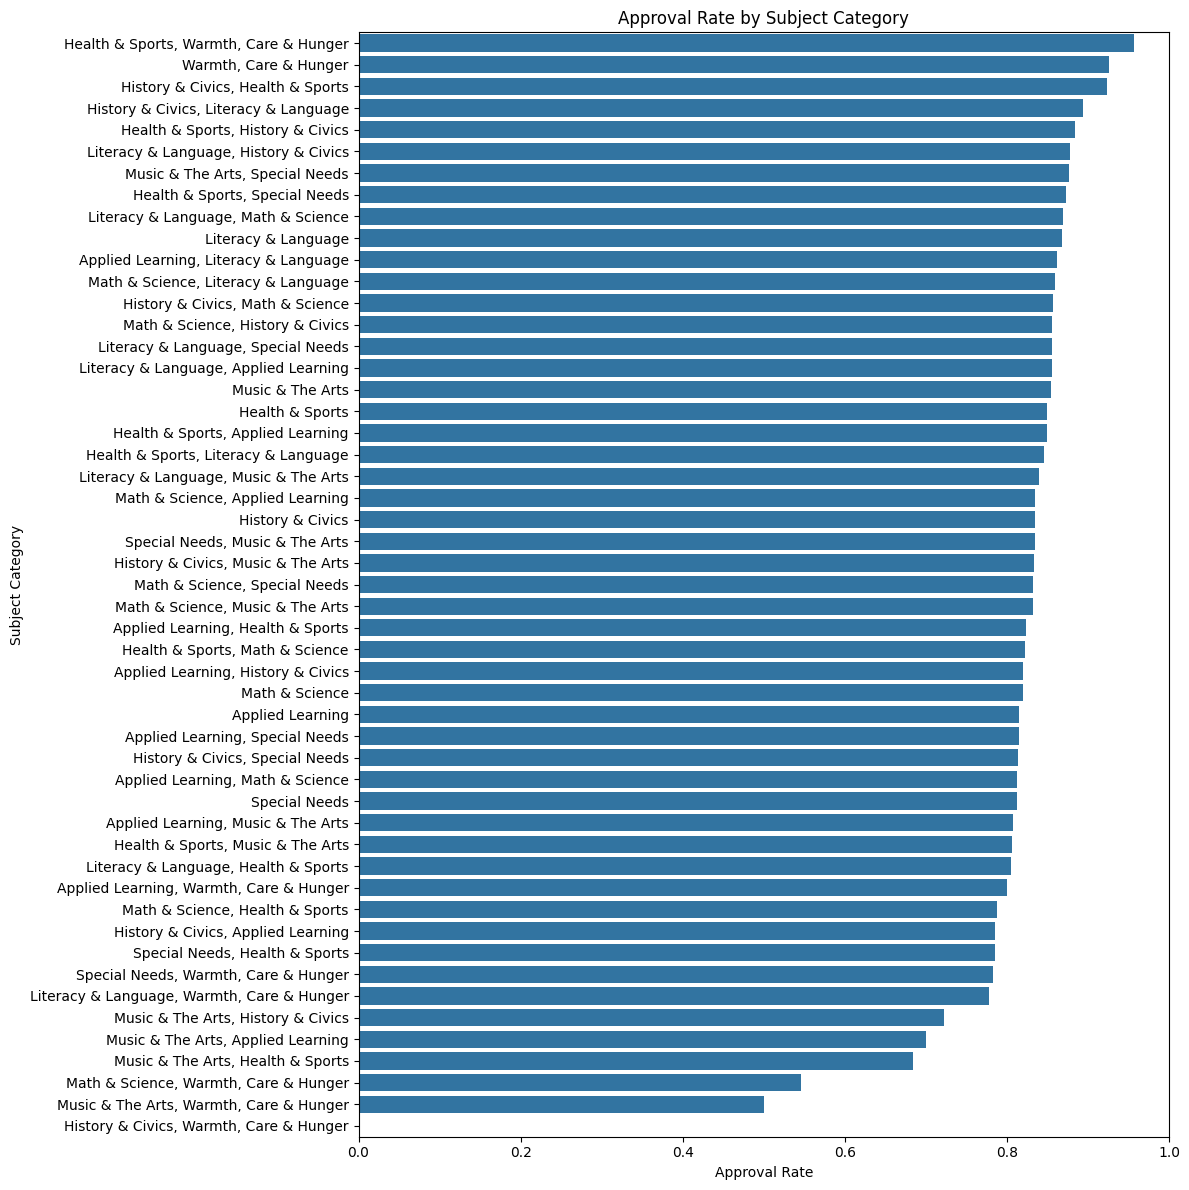

In [7]:
plt.figure(figsize=(12,12))
sns.barplot(data=grouped.sort_values(by='Approval Rate', ascending=False),
            x='Approval Rate', y='Subject Category')
plt.title("Approval Rate by Subject Category")
plt.xlabel("Approval Rate")
plt.ylabel("Subject Category")
plt.xlim(0, 1)
plt.tight_layout()
plt.show();


### Observations – Subject Category & Approval Rate

 **What’s Working Well** 
- Projects related to “Warmth, Care & Hunger”, get approved the most — especially when combined with Health & Sports or History & Civics. <br>
- Subjects like Literacy & Language, when combined with other core subjects like Math & Science or Applied Learning, also see high approval rates.<br>

 **In the Middle Range**
- Topics like Applied Learning, Math & Science, and Music & The Arts have okay approval rates. They do well when combined thoughtfully with other subjects.




In [8]:
# Sort and select top 5 and bottom 5
top_subjects = grouped.sort_values('Approval Rate', ascending=False).head(5)
bottom_subjects = grouped.sort_values('Approval Rate').head(5)

# Add a label to each group
top_subjects['Type'] = 'Top 5'
bottom_subjects['Type'] = 'Bottom 5'

# Combine using concat
combined = pd.concat([top_subjects, bottom_subjects], ignore_index=True)

# Display combined table
print(combined)

                          Subject Category  Approval Rate      Type
0   Health & Sports, Warmth, Care & Hunger       0.956522     Top 5
1                    Warmth, Care & Hunger       0.925898     Top 5
2        History & Civics, Health & Sports       0.923077     Top 5
3    History & Civics, Literacy & Language       0.894441     Top 5
4        Health & Sports, History & Civics       0.883721     Top 5
5  History & Civics, Warmth, Care & Hunger       0.000000  Bottom 5
6  Music & The Arts, Warmth, Care & Hunger       0.500000  Bottom 5
7    Math & Science, Warmth, Care & Hunger       0.545455  Bottom 5
8        Music & The Arts, Health & Sports       0.684211  Bottom 5
9       Music & The Arts, Applied Learning       0.700000  Bottom 5


In [9]:
grouped_2=df.groupby(['project_grade_category','project_subject_categories'])['project_is_approved'].mean().reset_index()
grouped_2.columns=['Grade Category','Subject Category','Approval Rate']
grouped_2

,Grade Category,Subject Category,Approval Rate
0,Grades 3-5,Applied Learning,0.818275
1,Grades 3-5,"Applied Learning, Health & Sports",0.766423
2,Grades 3-5,"Applied Learning, History & Civics",0.837838
3,Grades 3-5,"Applied Learning, Literacy & Language",0.875000
4,Grades 3-5,"Applied Learning, Math & Science",0.846154
...,...,...,...
192,Grades PreK-2,Special Needs,0.812532
193,Grades PreK-2,"Special Needs, Health & Sports",0.750000
194,Grades PreK-2,"Special Needs, Music & The Arts",0.819048
195,Grades PreK-2,"Special Needs, Warmth, Care & Hunger",0.714286


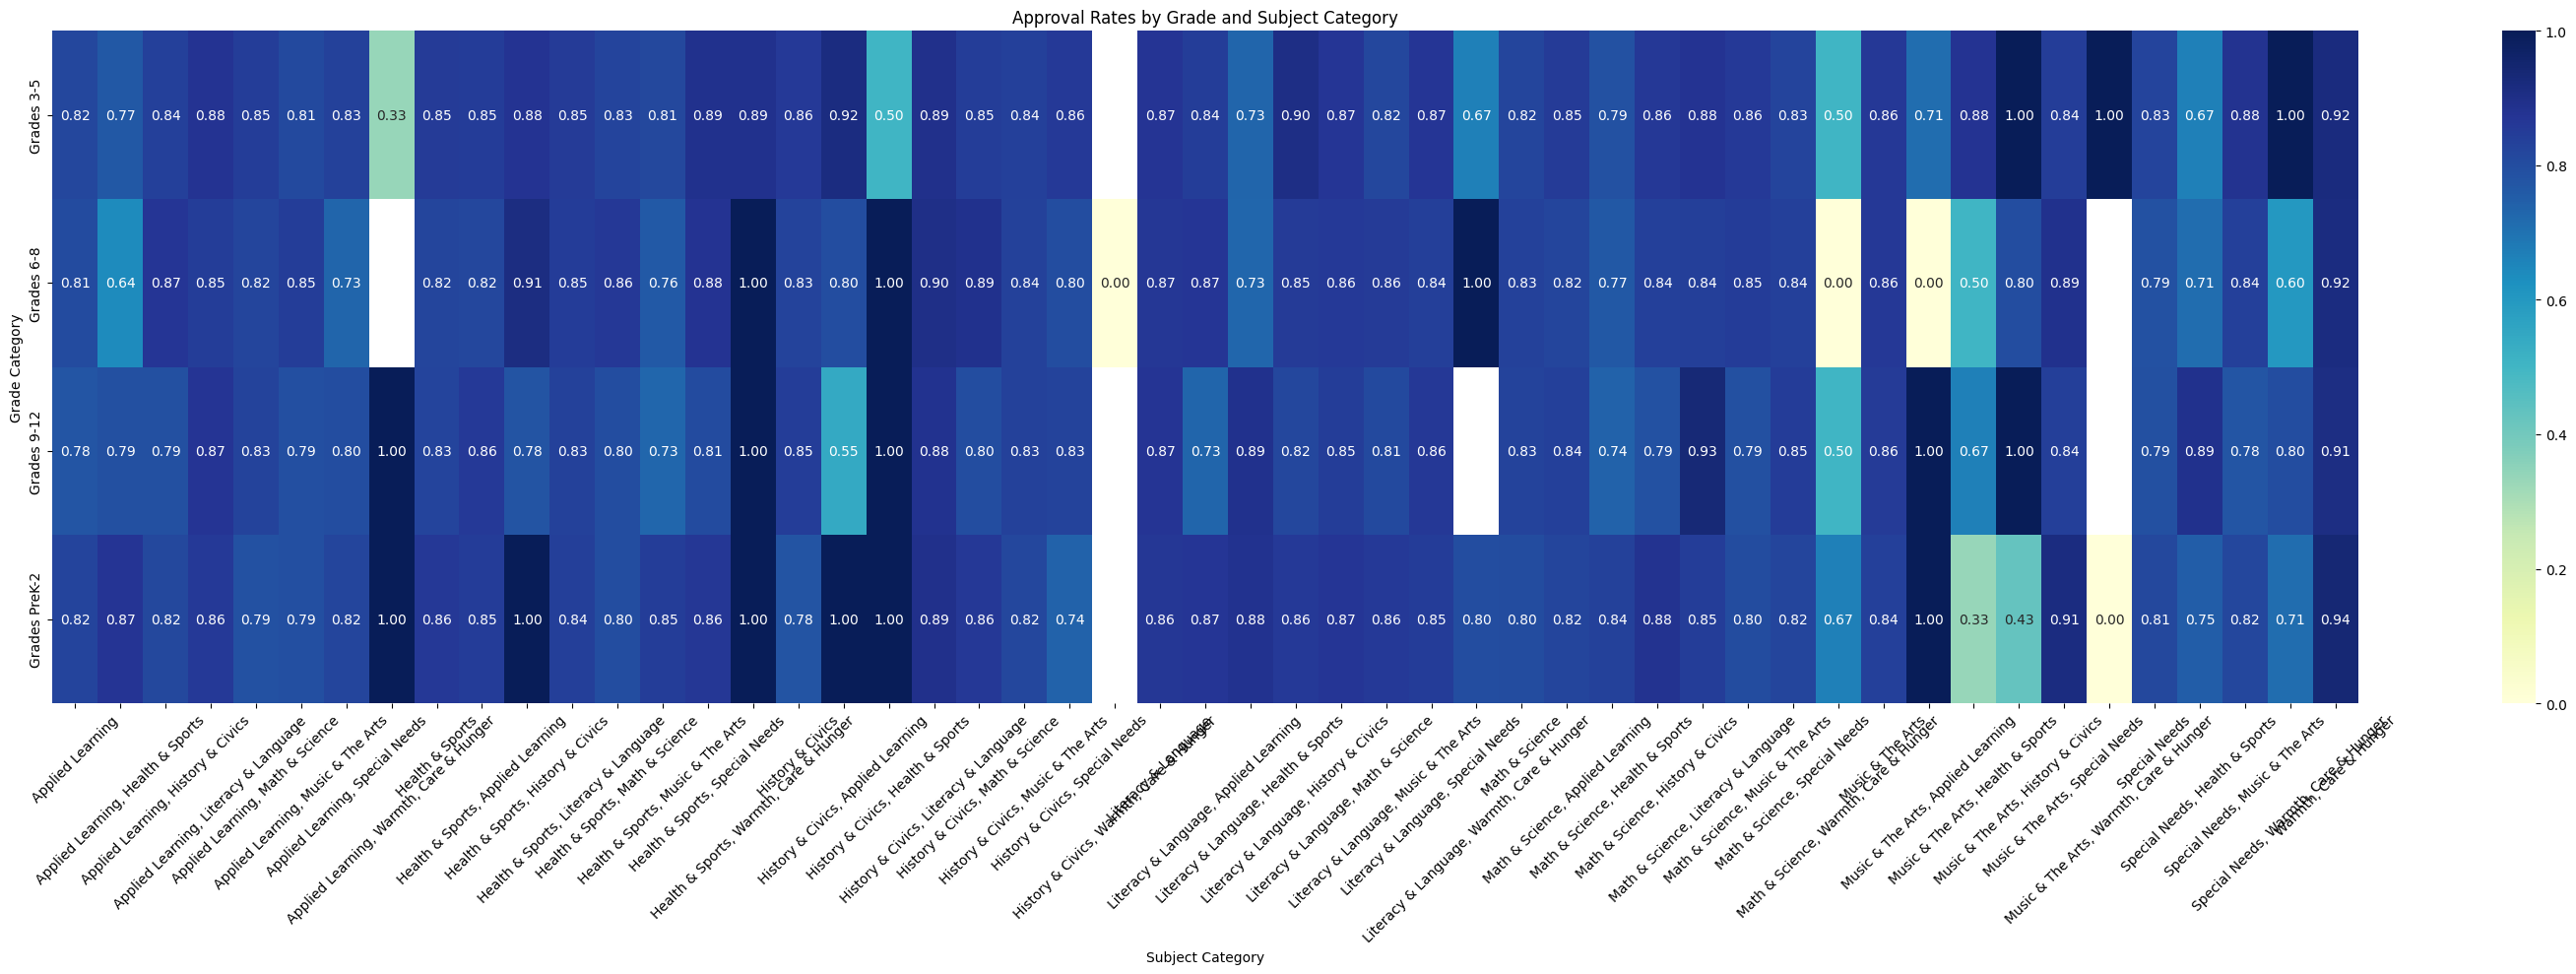

In [10]:
pivot = grouped_2.pivot(index='Grade Category', columns='Subject Category', values='Approval Rate')

plt.figure(figsize=(30, 10))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Approval Rates by Grade and Subject Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
grouped_2[grouped_2['Approval Rate']>0.95]

,Grade Category,Subject Category,Approval Rate
42,Grades 3-5,"Music & The Arts, History & Civics",1.0
44,Grades 3-5,"Music & The Arts, Warmth, Care & Hunger",1.0
48,Grades 3-5,"Special Needs, Warmth, Care & Hunger",1.0
64,Grades 6-8,"Health & Sports, Warmth, Care & Hunger",1.0
67,Grades 6-8,"History & Civics, Health & Sports",1.0
80,Grades 6-8,"Literacy & Language, Warmth, Care & Hunger",1.0
106,Grades 9-12,"Applied Learning, Warmth, Care & Hunger",1.0
114,Grades 9-12,"Health & Sports, Warmth, Care & Hunger",1.0
117,Grades 9-12,"History & Civics, Health & Sports",1.0
138,Grades 9-12,"Music & The Arts, Applied Learning",1.0


### Projects with 100% Approval Rates

- Every grade level — from PreK-2 all the way up to Grades 9-12 — has at least a few project combinations that received full approval.
- Highly successful projects often combine
    - Warmth, Care & Hunger
    - Health & Sports
    - History & Civics
    - Music & The Arts
    - Applied Learning



## Hypothesis Testing:  a Chi-square test to compare the distribution of approved and rejected projects across various subject categories

In [12]:
rejected_counts = (
    df.query("project_is_approved == 0")
      .groupby('project_subject_categories', as_index=False)
      .agg({'project_is_approved': 'count'})
      .rename(columns={'project_is_approved': 'Rejected Count'})
)

approved_counts = (
    df.query("project_is_approved == 1")
      .groupby('project_subject_categories', as_index=False)
      .agg({'project_is_approved': 'count'})
      .rename(columns={'project_is_approved': 'Approved Count'})
)

frequency_table = pd.merge(approved_counts, rejected_counts, on='project_subject_categories', how='outer').fillna(0)

frequency_table[['Approved Count', 'Rejected Count']] = frequency_table[['Approved Count', 'Rejected Count']].astype(int)
print(frequency_table)


                    project_subject_categories  Approved Count  Rejected Count
0                             Applied Learning            3072             699
1            Applied Learning, Health & Sports             501             107
2           Applied Learning, History & Civics             146              32
3        Applied Learning, Literacy & Language            1887             304
4             Applied Learning, Math & Science             855             197
5           Applied Learning, Music & The Arts             612             146
6              Applied Learning, Special Needs            1195             272
7      Applied Learning, Warmth, Care & Hunger               8               2
8                              Health & Sports            8640            1537
9            Health & Sports, Applied Learning             163              29
10           Health & Sports, History & Civics              38               5
11        Health & Sports, Literacy & Language      

In [13]:
from scipy.stats import chi2_contingency
observed = frequency_table[['Approved Count', 'Rejected Count']].values
chi2_stat, p_val, dof, expected = chi2_contingency(observed)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 512.4788727061738
P-Value: 5.942141163769451e-78
Degrees of Freedom: 50


We conducted a Chi-Square Test of Independence:

**Results**:
- Chi-Square Statistic: 512.4788727061738
- P-value = 5.942141163769451e-78

With a p-value far below 0.05, we **reject the null hypothesis**.

**Conclusion**: There is a significant association between project subject categories and approval outcomes.

In [14]:
residuals = observed - expected

residuals_df = pd.DataFrame(
    residuals,
    columns=['Approved Residual', 'Rejected Residual']
)
residuals_df['Subject Category'] = frequency_table['project_subject_categories'].values

residuals_df = residuals_df[['Subject Category', 'Approved Residual', 'Rejected Residual']]

residuals_df['Max Abs Residual'] = residuals_df[['Approved Residual', 'Rejected Residual']].abs().max(axis=1)
residuals_df = residuals_df.sort_values('Max Abs Residual', ascending=False)

print(residuals_df.head(10))

                         Subject Category  Approved Residual  \
32                         Math & Science        -496.009666   
24                    Literacy & Language         446.768179   
28    Literacy & Language, Math & Science         305.138620   
46                          Special Needs        -155.111929   
0                        Applied Learning        -128.006645   
50                  Warmth, Care & Hunger         101.204800   
19  History & Civics, Literacy & Language          65.163500   
6         Applied Learning, Special Needs         -49.871320   
4        Applied Learning, Math & Science         -37.709359   
14         Health & Sports, Special Needs          34.620991   

    Rejected Residual  Max Abs Residual  
32         496.009666        496.009666  
24        -446.768179        446.768179  
28        -305.138620        305.138620  
46         155.111929        155.111929  
0          128.006645        128.006645  
50        -101.204800        101.204800  
1

- Math & Science has a large negative approval residual (–496), meaning it received much fewer approvals than expected — and more rejections. <br>
- Literacy & Language has a strong positive approval residual (+446), indicating it was approved more often than expected. <br>
- Literacy & Language + Math & Science also shows up with a positive bias, which suggests interdisciplinary combinations involving literacy do better.